In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#abrupt
df_a_nc = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\abrupt\output_abrupt_NC.csv', names=['Accu_abrupt_NC'])
df_a_mc = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\abrupt\output_abrupt_MC.csv', names=['Accu_abrupt_MC'])
df_a_htsamknnhat = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\abrupt\output_abrupt_HT_SAMKNN_HAT.csv')
df_a_arf = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\abrupt\output_abrupt_arf.csv')
df_a_lb = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\abrupt\output_abrupt_LB.csv')

In [33]:
#gradual
df_g_nc = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\gradual\output_gradual_NC.csv', names=['Accu_gradual_NC'])
df_g_mc = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\gradual\output_gradual_MC.csv', names=['Accu_gradual_MC'])
df_g_htsamknnhat = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\gradual\output_gradual_HT_SAMKNN_HAT.csv')
df_g_arf = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\gradual\output_gradual_arf.csv')
df_g_lb = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\gradual\output_gradual_LB.csv')

In [35]:
#incremental
df_i_nc = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\incremental\output_incremental_NC.csv', names=['Accu_incremental_NC'])
df_i_mc = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\incremental\output_incremental_MC.csv', names=['Accu_incremental_MC'])
df_i_htsamknnhat = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\incremental\output_incremental_HT_SAMKNN_HAT.csv')
df_i_arf = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\incremental\output_incremental_LB.csv')
df_i_lb = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\incremental\output_incremental_arf.csv')

In [52]:
#drift-detection
try:
    df_a_d = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\Drift_Detection\Drift_Detection_abrupt.csv',names=['Instances'])
    df_i_d = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\Drift_Detection\Drift_Detection_incremental.csv',names=['Instances'])
    df_g_d = pd.read_csv(r'C:\Users\durga\Desktop\uOttawa\Term1\ML_HernaViktor\Assignments\Assignment4\Solution\Drift_Detection\Drift_Detection_gradual.csv',names=['Instances'])
except pd.errors.EmptyDataError:
    print("file empty")

In [36]:
i = 1000
id_list = []
#gradual
while i<=24000:
    id_list.append(i)
    i += 1000
df_g_nc['id'] = id_list
df_g_mc['id'] = id_list
#abrupt
while i <= 52000:
    id_list.append(i)
    i += 1000
df_a_nc['id'] = id_list
df_a_mc['id'] = id_list
#incremental
while i <= 57000:
    id_list.append(i)
    i += 1000
df_i_nc['id'] = id_list
df_i_mc['id'] = id_list

In [27]:
df_a = df_a_nc.merge(df_a_mc, how='outer', on='id')
df_a = df_a_htsamknnhat.merge(df_a, how='outer', on='id')
df_a = df_a_arf.merge(df_a, how='outer', on='id')
df_a = df_a_lb.merge(df_a, how='outer', on='id')
df_a = df_a.drop(columns=['current_acc_[HT]', 'current_acc_[SAMKNN]','current_acc_[HAT]', 'current_acc_[M0]_x', 'current_acc_[M0]_y'])
df_a = df_a.rename(columns={"mean_acc_[HT]": "Accu_HT", "mean_acc_[SAMKNN]": "Accu_SAMKNN", "mean_acc_[HAT]": "Accu_HAT", "mean_acc_[M0]_x": "Accu_arf", "mean_acc_[M0]_y": "Accu_lb"})

,id,Accu_arf,Accu_lb,Accu_HT,Accu_SAMKNN,Accu_HAT,Accu_abrupt_NC,Accu_abrupt_MC
0,1000,0.558000,0.699000,0.464000,0.651000,0.637000,0.158,0.342
1,2000,0.559500,0.694500,0.529000,0.641000,0.647000,0.166,0.197
2,3000,0.559333,0.702667,0.544000,0.650667,0.643000,0.183,0.191
3,4000,0.559250,0.704750,0.551250,0.654000,0.638000,0.160,0.179
4,5000,0.551000,0.703000,0.553800,0.652000,0.638000,0.173,0.182
5,6000,0.545333,0.707667,0.556000,0.651167,0.635833,0.186,0.192
6,7000,0.540571,0.715000,0.561429,0.649857,0.638000,0.195,0.181
7,8000,0.540500,0.717500,0.568000,0.654125,0.643750,0.186,0.184
8,9000,0.541667,0.720556,0.570889,0.651889,0.646111,0.182,0.187
9,10000,0.544700,0.721500,0.573500,0.654600,0.647600,0.200,0.181


<AxesSubplot: title={'center': 'Performance of Algorithms on Abrupt Dataset'}, xlabel='Instances', ylabel='Accuracy'>

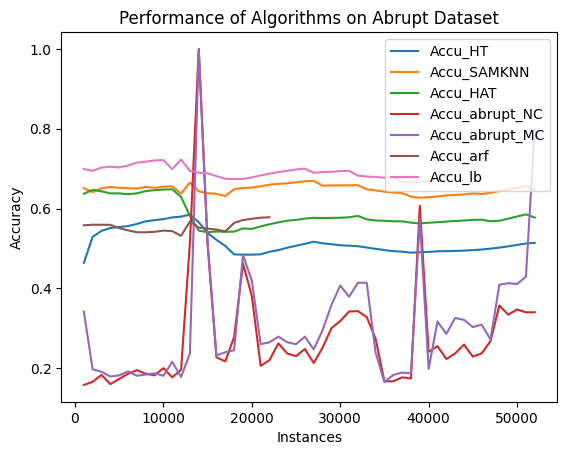

In [32]:
df_a.plot(x='id', y=['Accu_HT', 'Accu_SAMKNN', 'Accu_HAT', 'Accu_abrupt_NC', 'Accu_abrupt_MC', 'Accu_arf', 'Accu_lb'], title="Performance of Algorithms on Abrupt Dataset", xlabel="Instances",ylabel="Accuracy")

In [37]:
df_i = df_i_nc.merge(df_i_mc, how='outer', on='id')
df_i = df_i_htsamknnhat.merge(df_i, how='outer', on='id')
df_i = df_i_arf.merge(df_i, how='outer', on='id')
df_i = df_i_lb.merge(df_i, how='outer', on='id')
df_i = df_i.drop(columns=['current_acc_[HT]', 'current_acc_[SAMKNN]','current_acc_[HAT]', 'current_acc_[M0]_x', 'current_acc_[M0]_y'])
df_i = df_i.rename(columns={"mean_acc_[HT]": "Accu_HT", "mean_acc_[SAMKNN]": "Accu_SAMKNN", "mean_acc_[HAT]": "Accu_HAT", "mean_acc_[M0]_x": "Accu_arf", "mean_acc_[M0]_y": "Accu_lb"})

<AxesSubplot: title={'center': 'Performance of Algorithms on Incremental Dataset'}, xlabel='Instances', ylabel='Accuracy'>

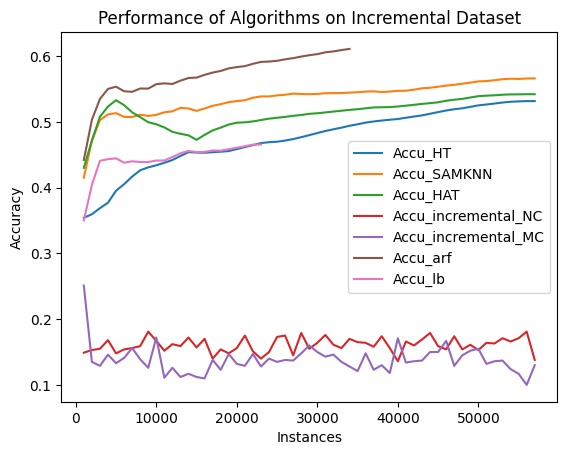

In [39]:
df_i.plot(x='id', y=['Accu_HT', 'Accu_SAMKNN', 'Accu_HAT', 'Accu_incremental_NC', 'Accu_incremental_MC', 'Accu_arf', 'Accu_lb'], title="Performance of Algorithms on Incremental Dataset", xlabel="Instances",ylabel="Accuracy")

In [40]:
df_g = df_g_nc.merge(df_g_mc, how='outer', on='id')
df_g = df_g_htsamknnhat.merge(df_g, how='outer', on='id')
df_g = df_g_arf.merge(df_g, how='outer', on='id')
df_g = df_g_lb.merge(df_g, how='outer', on='id')
df_g = df_g.drop(columns=['current_acc_[HT]', 'current_acc_[SAMKNN]','current_acc_[HAT]', 'current_acc_[M0]_x', 'current_acc_[M0]_y'])
df_g = df_g.rename(columns={"mean_acc_[HT]": "Accu_HT", "mean_acc_[SAMKNN]": "Accu_SAMKNN", "mean_acc_[HAT]": "Accu_HAT", "mean_acc_[M0]_x": "Accu_arf", "mean_acc_[M0]_y": "Accu_lb"})

<AxesSubplot: title={'center': 'Performance of Algorithms on Gradual Dataset'}, xlabel='Instances', ylabel='Accuracy'>

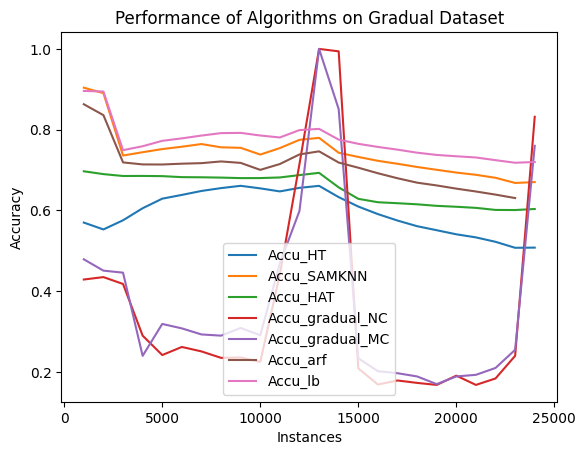

In [41]:
df_g.plot(x='id', y=['Accu_HT', 'Accu_SAMKNN', 'Accu_HAT', 'Accu_gradual_NC', 'Accu_gradual_MC', 'Accu_arf', 'Accu_lb'], title="Performance of Algorithms on Gradual Dataset", xlabel="Instances",ylabel="Accuracy")

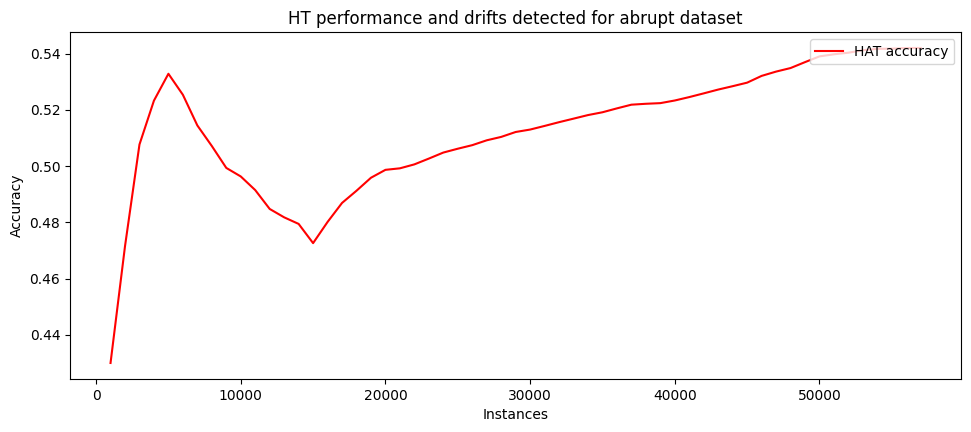

In [99]:
x1 = df_i['id']
y1 = df_i['Accu_HAT']

plt.plot(x1, y1, "r-", label='HAT accuracy')
#df_g_d = df_g_d.reset_index()  # make sure indexes pair with number of rows
for index, row in df_i_d.iterrows():
    plt.axvline(x=row['Instances'])
plt.ylabel('Accuracy')
plt.xlabel('Instances')
plt.title('HT performance and drifts detected for abrupt dataset')
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = [11.50, 4.50]
plt.show()

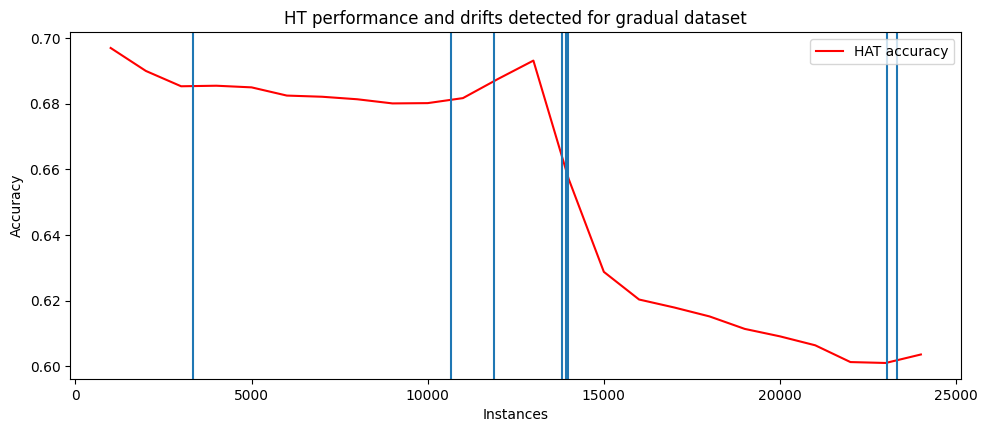

In [98]:
x1 = df_g['id']
y1 = df_g['Accu_HAT']

plt.plot(x1, y1, "r-", label='HAT accuracy')
#df_g_d = df_g_d.reset_index()  # make sure indexes pair with number of rows
for index, row in df_g_d.iterrows():
    plt.axvline(x=row['Instances'])
plt.ylabel('Accuracy')
plt.xlabel('Instances')
plt.title('HT performance and drifts detected for gradual dataset')
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = [11.50, 4.50]
plt.show()

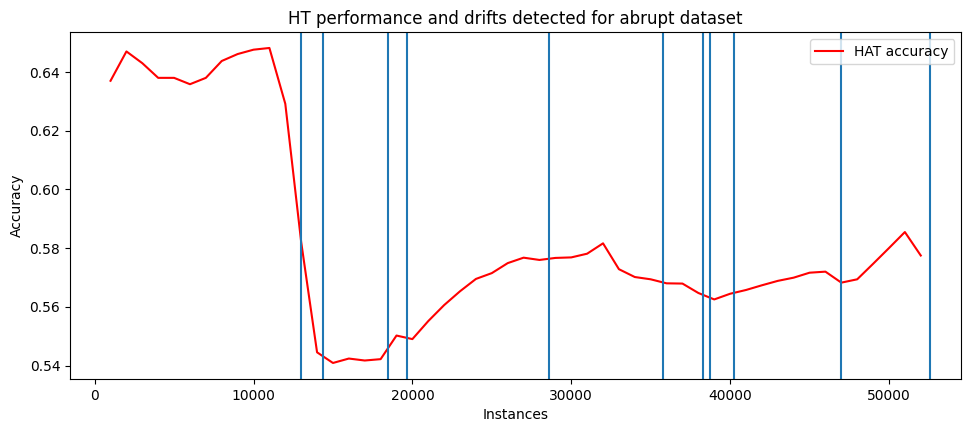

In [97]:
x1 = df_a['id']
y1 = df_a['Accu_HAT']

plt.plot(x1, y1, "r-", label='HAT accuracy')
#df_g_d = df_g_d.reset_index()  # make sure indexes pair with number of rows
for index, row in df_a_d.iterrows():
    plt.axvline(x=row['Instances'])
plt.ylabel('Accuracy')
plt.xlabel('Instances')
plt.title('HT performance and drifts detected for abrupt dataset')
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = [11.50, 4.50]
plt.show()

In [102]:
accu_a = [df_a["Accu_arf"].mean(), df_a["Accu_lb"].mean(), df_a["Accu_HT"].mean(),df_a["Accu_SAMKNN"].mean(), df_a["Accu_HAT"].mean(), df_a["Accu_abrupt_NC"].mean(), df_a["Accu_abrupt_MC"].mean()]
accu_a

[0.5545021818181819,
 0.691045625,
 0.5157243653846153,
 0.6480661153846154,
 0.5838068461538461,
 0.2784615384615384,
 0.31221153846153843]

In [104]:
accu_g = [df_g["Accu_arf"].mean(), df_g["Accu_lb"].mean(), df_g["Accu_HT"].mean(),df_g["Accu_SAMKNN"].mean(), df_g["Accu_HAT"].mean(), df_g["Accu_gradual_NC"].mean(), df_g["Accu_gradual_MC"].mean()]
accu_g

[0.7094203913043479,
 0.7726242500000001,
 0.5953463333333334,
 0.7429894999999999,
 0.6535040416666668,
 0.3619583333333333,
 0.37266666666666665]

In [105]:
accu_i = [df_i["Accu_arf"].mean(), df_i["Accu_lb"].mean(), df_i["Accu_HT"].mean(),df_i["Accu_SAMKNN"].mean(), df_i["Accu_HAT"].mean(), df_i["Accu_incremental_NC"].mean(), df_i["Accu_incremental_MC"].mean()]
accu_i

[0.5708618823529411,
 0.4438037826086957,
 0.47406954385964906,
 0.5354663859649123,
 0.5128122807017543,
 0.16080701754385962,
 0.1379298245614035]

In [106]:
accuracies_table = pd.DataFrame([accu_a, accu_g, accu_i], columns =['ARF', 'LB', 'HT', 'SAMKNN', 'HAT', 'NC', 'MC'], index=['Abrupt Dataset', 'Gradual dataset', 'Incremental dataset'])
accuracies_table

,ARF,LB,HT,SAMKNN,HAT,NC,MC
Abrupt Dataset,0.554502,0.691046,0.515724,0.648066,0.583807,0.278462,0.312212
Gradual dataset,0.709420,0.772624,0.595346,0.742989,0.653504,0.361958,0.372667
Incremental dataset,0.570862,0.443804,0.474070,0.535466,0.512812,0.160807,0.137930
